***MOVIE GENRE PREDICTION***

---




# Data preprocessing

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: GENRE, dtype: int64


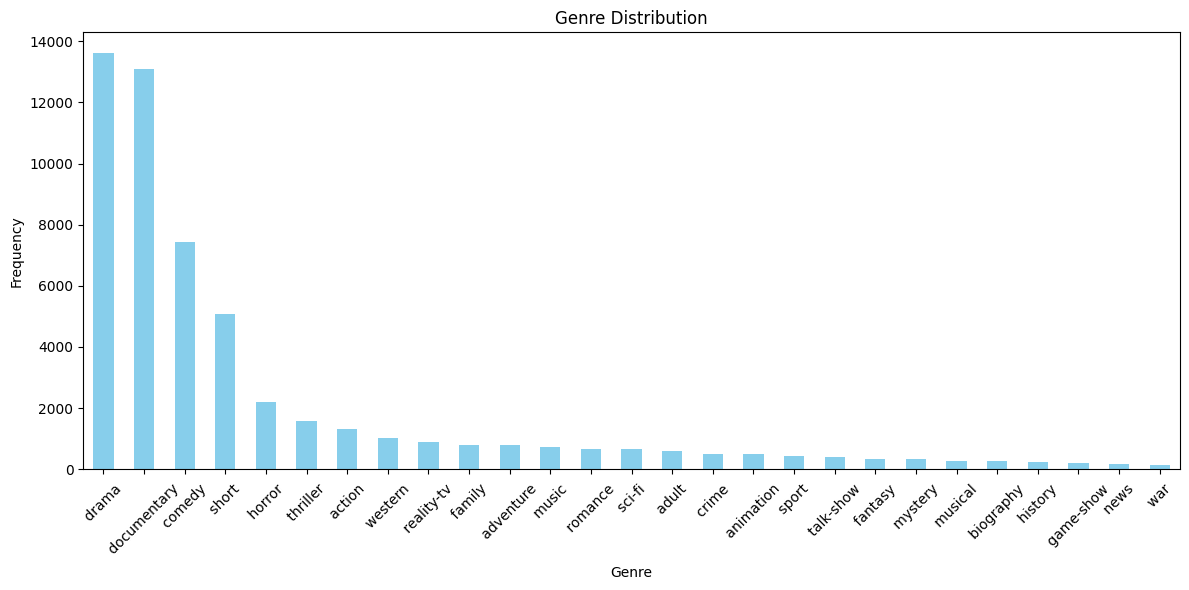

In [2]:
import pandas as pd

# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual dataset file path)
df = pd.read_csv('/content/drive/MyDrive/codsoft/Genre classification/train_data.csv')
df2 = pd.read_csv('/content/drive/MyDrive/codsoft/Genre classification/test_data_solution.csv')

# Count the frequency of each genre
genre_counts = df['GENRE'].value_counts()

print(genre_counts)

import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Standardization

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/codsoft/Genre classification/train_data.csv')

# Display unique genre values to ensure correct matching
print(df['GENRE'].unique())

# Define a mapping to replace the specified genres with unified genres
merge_map = {
    ' war ': ' family ',
    ' game-show ': ' animation ',
    ' talk-show ': ' family ',
    ' reality-tv ': ' drama ',
    ' news ': ' family ',
    ' action ': ' adventure ',
    ' musical ': ' music ',
    ' mystery ': ' thriller ',
    ' biography ': ' documentary ',
    ' fantasy ': ' sci-fi ',
    ' history ': ' family ',
    ' western ': ' music '
}

# Replace the genres with the unified genres
df['GENRE'] = df['GENRE'].replace(merge_map)

# Save the standardized dataset
df.to_csv('/content/drive/MyDrive/codsoft/Genre classification/standardized_movies.csv', index=False)


[' drama ' ' thriller ' ' adult ' ' documentary ' ' comedy ' ' crime '
 ' reality-tv ' ' horror ' ' sport ' ' animation ' ' action ' ' fantasy '
 ' short ' ' sci-fi ' ' music ' ' adventure ' ' talk-show ' ' western '
 ' family ' ' mystery ' ' history ' ' news ' ' biography ' ' romance '
 ' game-show ' ' musical ' ' war ']


In [4]:
# Display unique genre values to ensure correct matching
print(df2['GENRE'].unique())

# Define a mapping to replace the specified genres with unified genres
merge_map = {
    ' war ': ' family ',
    ' game-show ': ' animation ',
    ' talk-show ': ' family ',
    ' reality-tv ': ' drama ',
    ' news ': ' family ',
    ' action ': ' adventure ',
    ' musical ': ' music ',
    ' mystery ': ' thriller ',
    ' biography ': ' documentary ',
    ' fantasy ': ' sci-fi ',
    ' history ': ' family ',
    ' western ': ' music '
}

# Replace the genres with the unified genres
df2['GENRE'] = df2['GENRE'].replace(merge_map)

# Save the standardized dataset
df2.to_csv('/content/drive/MyDrive/codsoft/Genre classification/standardized_movies2.csv', index=False)


[' thriller ' ' comedy ' ' documentary ' ' drama ' ' horror ' ' short '
 ' western ' ' family ' ' sport ' ' romance ' ' war ' ' game-show '
 ' biography ' ' adult ' ' talk-show ' ' action ' ' music ' ' crime '
 ' animation ' ' sci-fi ' ' adventure ' ' reality-tv ' ' fantasy '
 ' mystery ' ' history ' ' news ' ' musical ']


 drama           14497
 documentary     13361
 comedy           7447
 short            5073
 horror           2204
 adventure        2090
 music            2040
 thriller         1910
 family           1731
 sci-fi            970
 animation         692
 romance           672
 adult             590
 crime             505
 sport             432
Name: GENRE, dtype: int64


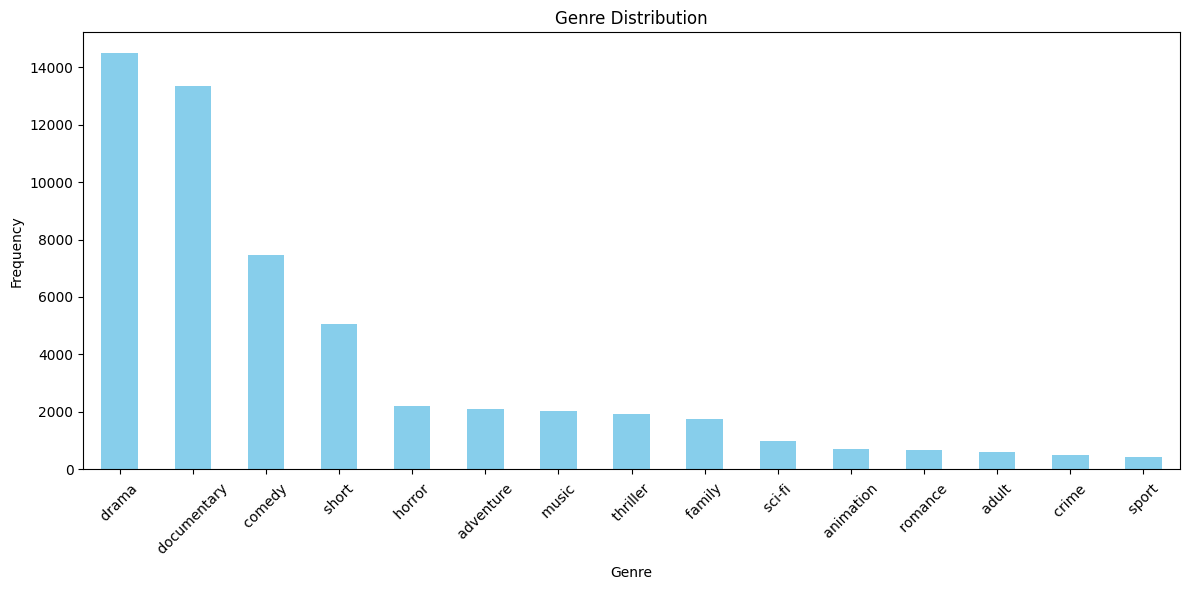

In [5]:
import pandas as pd

# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual dataset file path)
df = pd.read_csv('/content/drive/MyDrive/codsoft/Genre classification/standardized_movies.csv')
df2 = pd.read_csv('/content/drive/MyDrive/codsoft/Genre classification/standardized_movies2.csv')

# Count the frequency of each genre
genre_counts = df['GENRE'].value_counts()

print(genre_counts)

import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Vectorization

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(df['DESCRIPTION'])

# Convert the TF-IDF matrix to a DataFrame for visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the TF-IDF features with the original DataFrame
df = pd.concat([df, tfidf_df], axis=1)

df.sample(5)


,ID,TITLE,GENRE,DESCRIPTION,000,10,11,12,15,20,...,worse,writer,written,wrong,year,years,york,young,younger,youth
47886,47887,Jakub (1992),documentary,After second world war the people from Ruthen...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
26835,26836,Ginger Ale Afternoon (1989),comedy,Jesse is nine months pregnant and lives with ...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.156608,0.0,0.0
33895,33896,Natural Instinct (2002),adult,Experience the thrill of the hunt like a beas...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
38692,38693,Gakkô no kaidan 3 (1997),horror,"Third installment of the ""Gakko No Kaidan"" se...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
27914,27915,The Deal (2017/VI),drama,The Deal is a 2017 indie film that exalts the...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


Training the model

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Separate the labels from the features
X = tfidf_df  # Features
y = df['GENRE']  # Labels

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Initialize the Logistic Regression model
clf_lr = LogisticRegression(C=0.1, max_iter=1000)

# Train the model on the training data
clf_lr.fit(X_train, y_train)

# Predict on the validation set
y_pred = clf_lr.predict(X_val)

print(classification_report(y_val, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       adult        0.00      0.00      0.00       118
   adventure        0.49      0.06      0.10       418
   animation        1.00      0.01      0.01       138
      comedy        0.50      0.40      0.44      1490
       crime        0.00      0.00      0.00       101
 documentary        0.59      0.86      0.70      2672
       drama        0.46      0.79      0.58      2900
      family        0.25      0.01      0.01       346
      horror        0.66      0.27      0.38       441
       music        0.79      0.34      0.48       408
     romance        0.00      0.00      0.00       134
      sci-fi        0.50      0.02      0.03       194
       short        0.52      0.15      0.23      1015
       sport        0.83      0.06      0.11        86
    thriller        0.52      0.04      0.07       382

     accuracy                           0.52     10843
    macro avg       0.47      0.20      0.21     10843
 weighte

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SMOTE


Oversampling since the data is not equally distributed

In [8]:
from imblearn.over_sampling import SMOTE

# Split the data into features (X) and labels (y)
X = tfidf_df  # Features
y = df['GENRE']

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

y_resampled.value_counts()
# Now, X_resampled and y_resampled contain the balanced dataset


 drama           14497
 thriller        14497
 adult           14497
 documentary     14497
 comedy          14497
 crime           14497
 horror          14497
 sport           14497
 animation       14497
 adventure       14497
 sci-fi          14497
 short           14497
 music           14497
 family          14497
 romance         14497
Name: GENRE, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the oversampled data into training and validation sets
X_train_over, X_val_over, y_train_over, y_val_over = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train the model
clf_lr.fit(X_train_over, y_train_over)

# Make predictions on the validation set
y_pred_lr = clf_lr.predict(X_val_over)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_val_over, y_pred_lr))
print(f"Logistic Regression Accuracy: {accuracy_score(y_val_over, y_pred_lr) * 100:.2f}%")


Logistic Regression Classification Report:
               precision    recall  f1-score   support

       adult        0.79      0.88      0.83      2899
   adventure        0.54      0.47      0.50      2899
   animation        0.68      0.64      0.66      2899
      comedy        0.48      0.35      0.40      2900
       crime        0.72      0.76      0.74      2900
 documentary        0.60      0.61      0.60      2899
       drama        0.43      0.35      0.38      2900
      family        0.61      0.54      0.57      2900
      horror        0.70      0.74      0.72      2899
       music        0.77      0.81      0.79      2899
     romance        0.69      0.83      0.75      2900
      sci-fi        0.68      0.73      0.71      2899
       short        0.47      0.55      0.51      2900
       sport        0.84      0.94      0.88      2899
    thriller        0.54      0.48      0.51      2899

     accuracy                           0.65     43491
    macro avg       

Visualizing the report on test data

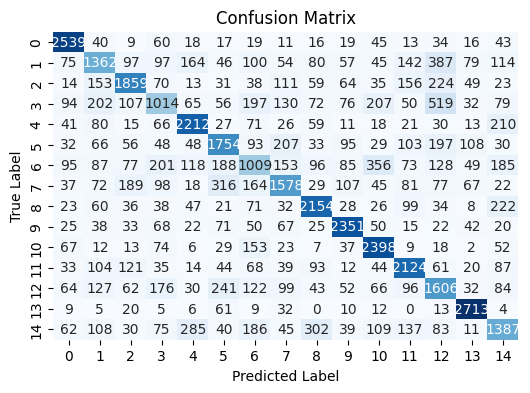

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_val_over, y_pred_lr)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()